In [154]:
import os
import cv2
import numpy as np 

from pathlib import Path
import argparse

from matplotlib import pyplot as plt

In [155]:
def get_bbox(msk):
    rows = np.any(msk, axis=1)
    cols = np.any(msk, axis=0)
    rmin, rmax = np.where(rows)[0][[0,-1]]
    cmin, cmax = np.where(cols)[0][[0,-1]]

    return rmin, rmax, cmin, cmax

def process_img(img, msk, bbox=None):
    if bbox is None:
        bbox = get_bbox(msk > 100)
    cx = (bbox[3] + bbox[2])//2
    cy = (bbox[1] + bbox[0])//2

    w = img.shape[1]
    h = img.shape[0]
    height = int(1.138*(bbox[1] - bbox[0]))
    hh = height//2

    # crop
    dw = min(cx, w-cx, hh)
    if cy-hh < 0:
        img = cv2.copyMakeBorder(img,hh-cy,0,0,0,cv2.BORDER_CONSTANT,value=[0,0,0])    
        msk = cv2.copyMakeBorder(msk,hh-cy,0,0,0,cv2.BORDER_CONSTANT,value=0)    
    if cy+hh > h:
        img = cv2.copyMakeBorder(img,0,cy+hh-h,0,0,cv2.BORDER_CONSTANT,value=[0,0,0])    
        msk = cv2.copyMakeBorder(msk,0,cy+hh-h,0,0,cv2.BORDER_CONSTANT,value=0)    

#     img = img[cy-hh:(cy+hh),cx-dw:cx+dw,:]
#     msk = msk[cy-hh:(cy+hh),cx-dw:cx+dw]

    img = img[cy+hh-h:(cy+hh),cx-dw:cx+dw,:]
    msk = msk[cy+hh-h:(cy+hh),cx-dw:cx+dw]

    dw = img.shape[0] - img.shape[1]
    if dw != 0:
        img = cv2.copyMakeBorder(img,0,0,dw//2,dw//2,cv2.BORDER_CONSTANT,value=[0,0,0])    
        msk = cv2.copyMakeBorder(msk,0,0,dw//2,dw//2,cv2.BORDER_CONSTANT,value=0)    
    img = cv2.resize(img, (512, 512))
    msk = cv2.resize(msk, (512, 512))

    kernel = np.ones((3,3),np.uint8)
    msk = cv2.erode((255*(msk > 100)).astype(np.uint8), kernel, iterations = 1)

    return img, msk

In [156]:
input_image = 'C:\_Files\MyProjects\ASDS_3\Photo_Wake-Up\src\PIFu\sample_images\man1_bg.png'
input_mask  = 'C:\_Files\MyProjects\ASDS_3\Photo_Wake-Up\src\PIFu\sample_images\man1_bg_mask.png'
out_path    = '../sample_images'

In [157]:
img = cv2.imread(input_image)
msk = cv2.imread(input_mask, cv2.IMREAD_GRAYSCALE)

In [158]:
img_new, msk_new = process_img(img, msk)

(500, 500, 3)
(512, 512, 3)


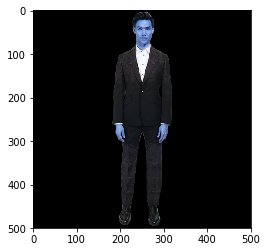

In [164]:
print(img.shape)
print(img_new.shape)
plt.imshow(img)

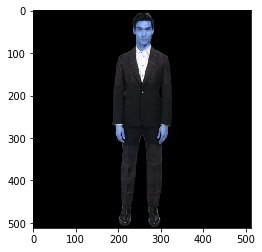

In [165]:
plt.imshow(img_new)

In [ ]:
img_name = Path(args.input_image).stem

cv2.imwrite(os.path.join(args.out_path, img_name + '.png'), img_new)
cv2.imwrite(os.path.join(args.out_path, img_name + '_mask.png'), msk_new)